In [1]:
%matplotlib inline 
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from mpl_toolkits.mplot3d import Axes3D #Create 3D plot
from sklearn.cluster import KMeans #Import learning algorithm

In [2]:
features = pd.read_csv('heart.csv')
features.head(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [3]:
print('The shape of our features is:', features.shape)

The shape of our features is: (303, 14)


In [4]:
# Descriptive statistics for each column
features.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [5]:
# Labels are the values we want to predict
labels = np.array(features['target'])
# Remove the labels from the features
# axis 1 refers to the columns
features= features.drop('target', axis = 1)
# Saving feature names for later use
feature_list = list(features.columns)
# Convert to numpy array
features = np.array(features)

In [25]:
from sklearn.manifold import TSNE
tsne = TSNE(verbose=1, perplexity=40, n_iter= 4000)
Y = tsne.fit_transform(features)

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 303 samples in 0.001s...
[t-SNE] Computed neighbors for 303 samples in 0.016s...
[t-SNE] Computed conditional probabilities for sample 303 / 303
[t-SNE] Mean sigma: 9.547481
[t-SNE] KL divergence after 250 iterations with early exaggeration: 57.219051
[t-SNE] KL divergence after 900 iterations: 0.510388


In [6]:
# Initialize the KMeans cluster module. Setting it to find two clusters, hoping to find malignant vs benign.
clusters = KMeans(n_clusters=2, max_iter=300)

In [31]:
# Fit model to our selected features.
kY = clusters.fit_predict(features)
print(kY)

[0 0 0 0 1 0 1 1 0 0 0 1 1 0 1 0 1 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 1 0 0 1
 0 1 1 1 0 0 1 1 1 0 0 0 0 0 1 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 1
 0 0 0 0 0 0 0 1 1 1 1 1 1 0 0 0 0 0 0 1 0 0 1 0 1 0 0 1 0 0 0 0 0 0 0 0 1
 0 1 0 1 0 0 0 0 0 1 1 1 1 0 0 0 1 0 1 0 1 1 0 1 1 0 0 0 1 1 1 0 0 0 0 0 0
 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 1 0 1 0 0 0 0 1 0 0 0 0 1 0 1 1 0 1 0 0
 1 0 1 0 0 1 0 0 1 0 1 0 0 1 0 0 1 1 1 0 0 0 1 0 0 0 1 0 1 0 1 1 1 0 0 1 0
 1 1 0 0 1 0 1 1 0 1 1 0 1 1 1 1 1 1 1 0 0 1 0 1 1 0 1 0 1 0 1 1 1 1 1 0 0
 0 0 0 1 1 0 0 1 0 1 1 0 0 0 0 1 0 0 1 1 0 1 0 0 0 0 1 0 0 1 0 0 1 0 0 0 0
 0 0 0 1 0 0 0]


In [27]:
# Put centroids and results into variables.
centroids = clusters.cluster_centers_
labels = clusters.labels_

# Sanity check
print(centroids)

[[5.30621762e+01 7.40932642e-01 1.05181347e+00 1.29746114e+02
  2.16259067e+02 1.55440415e-01 5.75129534e-01 1.51818653e+02
  2.84974093e-01 9.73575130e-01 1.40932642e+00 6.68393782e-01
  2.25906736e+00]
 [5.66545455e+01 5.81818182e-01 8.18181818e-01 1.34918182e+02
  2.98909091e+02 1.36363636e-01 4.45454545e-01 1.45836364e+02
  4.00000000e-01 1.15545455e+00 1.38181818e+00 8.36363636e-01
  2.40909091e+00]]


Percent matched between benign and malignant  0.0


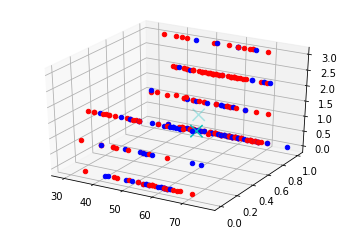

In [23]:
# Create new MatPlotLib figure
fig = plt.figure()
# Add 3rd dimension to figure
ax = fig.add_subplot(111, projection='3d')
# This means "red" and "blue"
colors = ["r", "b"]

# Plot all the features and assign color based on cluster identity label
for i in range(len(features)):
    ax.scatter(xs=features[i][0], ys=features[i][1], zs=features[i][2],
               c=colors[labels[i]], zdir='z')

# Plot centroids, though you can't really see them.
ax.scatter(xs=centroids[:,0], ys=centroids[:,1], zs=centroids[:,2],
           marker="x", s=150, c="c")

# Create array of diagnosis data, which should be same length as labels.
diag = np.array(labels)
# Create variable to hold matches in order to get percentage accuracy.
matches = 0

# Transform diagnosis vector from B||M to 0||1 and matches++ if correct.
# for i in range(0, len(diag)):
#     if diag[i] == "B":
#         diag[i] = 0
#     if diag[i] == "M":
#         diag[i] = 1
#     if diag[i] == labels[i]:
#         matches = matches + 1

#Calculate percentage matches and print.
# percentMatch = (matches/len(diag))*100
# print("Percent matched between benign and malignant ", percentMatch)

#Set labels on figure and show 3D scatter plot to visualize data and clusters.
#ax.set_xlabel("Radius Mean")
#ax.set_ylabel("Concavity Mean")
#ax.set_zlabel("Symmetry Mean")
plt.show()

#Finis

In [20]:
print(features[3][3])

120.0


In [21]:
#Creating a 2D visualization to visualize the clusters


[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 303 samples in 0.292s...
[t-SNE] Computed neighbors for 303 samples in 0.286s...
[t-SNE] Computed conditional probabilities for sample 303 / 303
[t-SNE] Mean sigma: 9.547481
[t-SNE] KL divergence after 250 iterations with early exaggeration: 59.103645
[t-SNE] KL divergence after 800 iterations: 0.492661


Text(0.5, 1.0, 'Actual clusters')

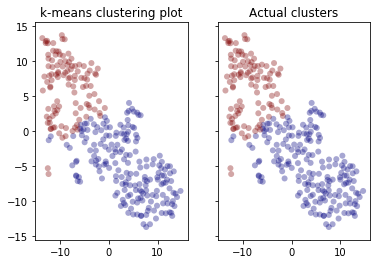

In [30]:
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True)

ax1.scatter(Y[:,0],Y[:,1],  c=kY, cmap = "jet", edgecolor = "None", alpha=0.35)
ax1.set_title('k-means clustering plot')

ax2.scatter(Y[:,0],Y[:,1],  c = labels, cmap = "jet", edgecolor = "None", alpha=0.35)
ax2.set_title('Actual clusters')